In [1]:
# Manage data and statistics
import numpy as np
from numpy.random import default_rng, SeedSequence
import pandas as pd
from pandas.api.types import CategoricalDtype

from scipy import stats
from scipy.stats.mstats import winsorize

# Plot data
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
mpl.style.use('tableau-colorblind10')

import seaborn as sns
sns.set_style("white")
sns.set_context("notebook")

from IPython.display import Image, display

# statsmodels
import patsy
from patsy import dmatrices
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

# scikit-learn
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score

from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.tree import plot_tree, export_text

from sklearn.ensemble import BaggingRegressor, BaggingClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

## Read `Hitters` dataset

In [2]:
hitters = pd.read_csv('https://raw.githubusercontent.com/cbrownley/2022MLWEEK_MLWITHPYTHON/main/data/Hitters.csv')

hitters = hitters.loc[~hitters.Salary.isna(), :]

hitters

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


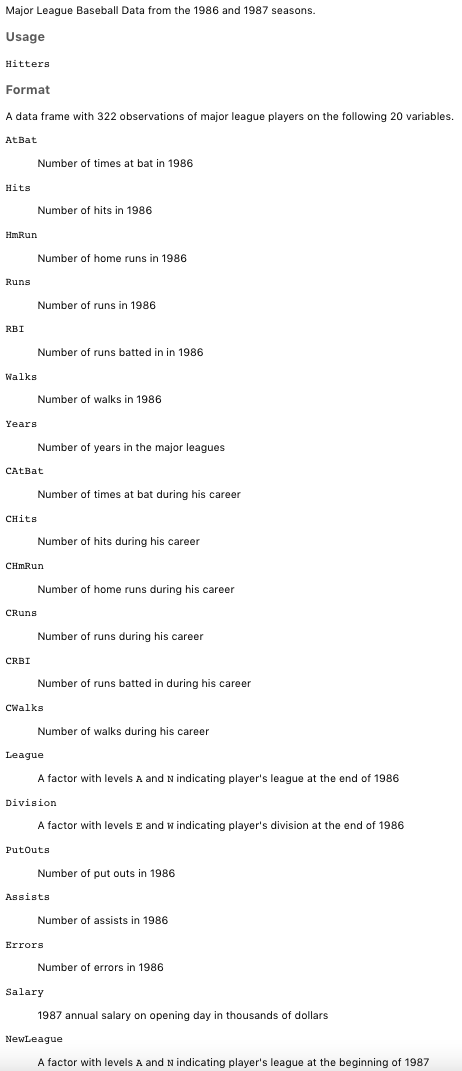

In [3]:
display(Image('../../images/hitters_description.png'))

## Check data types and values

In [ ]:
hitters.dtypes

AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object

In [ ]:
hitters.describe().round(1)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,263.0,263.0,263.0,263.0,263.0,263.0,263.0,263.0,263.0,263.0,263.0,263.0,263.0,263.0,263.0,263.0,263.0
mean,403.6,107.8,11.6,54.7,51.5,41.1,7.3,2657.5,722.2,69.2,361.2,330.4,260.3,290.7,118.8,8.6,535.9
std,147.3,45.1,8.8,25.5,25.9,21.7,4.8,2286.6,648.2,82.2,331.2,323.4,264.1,279.9,145.1,6.6,451.1
min,19.0,1.0,0.0,0.0,0.0,0.0,1.0,19.0,4.0,0.0,2.0,3.0,1.0,0.0,0.0,0.0,67.5
25%,282.5,71.5,5.0,33.5,30.0,23.0,4.0,842.5,212.0,15.0,105.5,95.0,71.0,113.5,8.0,3.0,190.0
50%,413.0,103.0,9.0,52.0,47.0,37.0,6.0,1931.0,516.0,40.0,250.0,230.0,174.0,224.0,45.0,7.0,425.0
75%,526.0,141.5,18.0,73.0,71.0,57.0,10.0,3890.5,1054.0,92.5,497.5,424.5,328.5,322.5,192.0,13.0,750.0
max,687.0,238.0,40.0,130.0,121.0,105.0,24.0,14053.0,4256.0,548.0,2165.0,1659.0,1566.0,1377.0,492.0,32.0,2460.0


In [ ]:
hitters.League.value_counts()

A    139
N    124
Name: League, dtype: int64

In [ ]:
hitters.Division.value_counts()

W    134
E    129
Name: Division, dtype: int64

In [ ]:
hitters.NewLeague.value_counts()

A    141
N    122
Name: NewLeague, dtype: int64

## Create dummy indicator variables

In [ ]:
hitters['IsAmericanLeague'] = np.where(hitters['League'] == 'A', 1.0, 0.0)

In [ ]:
hitters['IsAmericanNewLeague'] = np.where(hitters['NewLeague'] == 'A', 1.0, 0.0)

In [ ]:
hitters['IsEasternDivision'] = np.where(hitters['Division'] == 'E', 1.0, 0.0)

## Center and Scale numeric predictors

In [ ]:
numeric_predictors = ['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors', 'IsAmericanLeague', 'IsEasternDivision']

#hitters[numeric_predictors] = (hitters[numeric_predictors] - hitters[numeric_predictors].mean()) / hitters[numeric_predictors].std()

In [ ]:
hitters.drop(labels=['League', 'Division', 'NewLeague', 'IsAmericanNewLeague'], axis=1, inplace=True)

hitters = hitters[['Salary'] + numeric_predictors]

hitters

,Salary,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,IsAmericanLeague,IsEasternDivision
1,475.0,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,0.0,0.0
2,480.0,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,1.0,0.0
3,500.0,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,0.0,1.0
4,91.5,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,0.0,1.0
5,750.0,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,700.0,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,0.0,1.0
318,875.0,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,1.0,1.0
319,385.0,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,1.0,0.0
320,960.0,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,1.0,1.0


## $log$(Salary) ~ Years + Hits

In [ ]:
mlb_salaries = hitters[['Years', 'Hits']].join(hitters['Salary'].apply(lambda x: np.log(x)))
mlb_salaries

,Years,Hits,Salary
1,14,81,6.163315
2,3,130,6.173786
3,11,141,6.214608
4,2,87,4.516339
5,11,169,6.620073
...,...,...,...
317,5,127,6.551080
318,12,136,6.774224
319,6,126,5.953243
320,8,144,6.866933


In [ ]:
X, y = mlb_salaries[['Years', 'Hits']].values, mlb_salaries['Salary'].values

X[:3], y[:3]

(array([[ 14,  81],
        [  3, 130],
        [ 11, 141]]), array([6.1633148, 6.1737861, 6.2146081]))

In [ ]:
dt_reg1 = DecisionTreeRegressor(max_depth=2)

dt_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2)

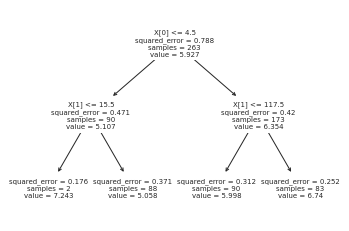

In [ ]:
# SOURCE: https://scikit-learn.org/stable/modules/tree.html
plot_tree(dt_reg1);

The figure below shows a regression tree fit to this data.

It consists of a series of splitting rules, starting at the top of the tree.  The top split assigns observations having `Years` <= 4.5 to the left branch.  The predicted salary for these players is given by the mean response value for the players in the data set with `Years` <= 4.5.  For such players, the mean log salary is 5.107, and so we make a prediction of $e^{5.107}$ thousands of dollars, i.e. $165,174, for these players.  Players with `Years` > 4.5 are assigned to the right branch, and then that group is further subdivided by `Hits`.

Overall, the tree stratifies or segments the players into three regions of predictor space: 

* players who have played for four or fewer years
* players who have played for five or more years and who made fewer than 118 hits last year
* players who have played for five or more years and who made at least 118 hits last year

The predicted salaries for the three groups are \$1,000 x $e^{5.107}$ = \$165,174, \$1,000 x $e^{5.999}$ = \$402,834, and \$1,000 x $e^{6.740}$ = \$845,346, respectively.

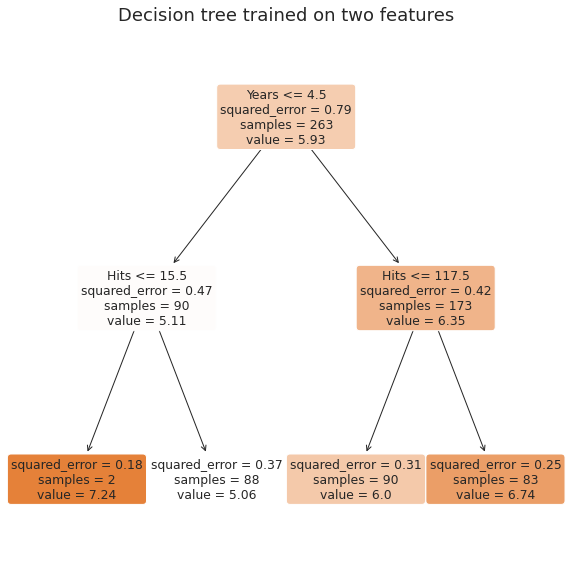

In [ ]:
# SOURCE: Introduction to Statistical Learning, 2nd Edition Figure 8.1
plt.figure(figsize=(10,10))
plot_tree(dt_reg1, feature_names=['Years', 'Hits'], filled=True, rounded=True, precision=2)
plt.title("Decision tree trained on two features", fontsize=18);

In keeping with the *tree* analogy, the figure below shows the three regions $R_{1}$, $R_{2}$, and $R_{3}$, which are known as *terminal nodes* or *leaves* of the tree.  

The number in each leaf is the mean of the response, here, $log(salary)$, for the observations that fall in the region -- that is, the mean log salary in region $R_{1}$ is 5.107, the mean log salary in region $R_{2}$ is 5.999, and the mean log salary in region $R_{3}$ is 6.740.

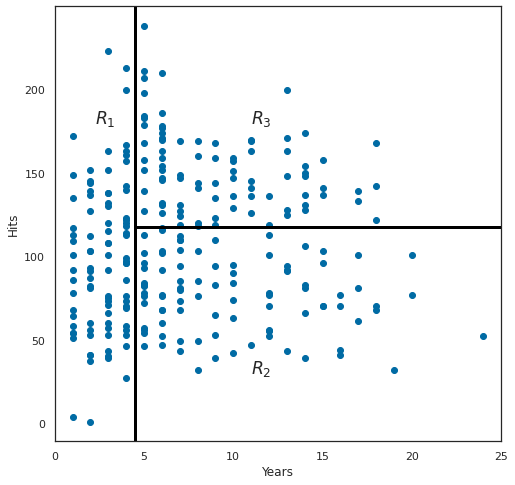

In [ ]:
# SOURCE: Introduction to Statistical Learning, 2nd Edition Figure 8.2
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(mlb_salaries.Years, mlb_salaries.Hits)
ax.axvline(x=4.5, color='k', linewidth=3)
ax.hlines(y=117.5, xmin=4.5, xmax=25, color='k', linewidth=3)
ax.text(x=2.25, y=180, s='$R_1$', fontdict=dict(fontsize='x-large', fontweight='bold'))
ax.text(x=11,   y=30,  s='$R_2$', fontdict=dict(fontsize='x-large', fontweight='bold'))
ax.text(x=11,   y=180, s='$R_3$', fontdict=dict(fontsize='x-large', fontweight='bold'))
ax.set(xlim=(0,25), xlabel='Years', ylabel='Hits');

## $log$(Salary) ~ All Predictors

In [ ]:
train = hitters.sample(n=132, random_state=124)

X_train, y_train = train.iloc[:, 1:].values, np.log(train['Salary'].values)

X_train[:3], y_train[:3]

(array([[4.960e+02, 1.190e+02, 8.000e+00, 5.700e+01, 3.300e+01, 2.100e+01,
         7.000e+00, 3.358e+03, 8.820e+02, 3.600e+01, 3.650e+02, 2.800e+02,
         1.650e+02, 1.550e+02, 3.710e+02, 2.900e+01, 0.000e+00, 0.000e+00],
        [4.840e+02, 1.270e+02, 2.000e+01, 6.600e+01, 6.500e+01, 6.700e+01,
         7.000e+00, 3.006e+03, 8.440e+02, 1.160e+02, 4.360e+02, 4.580e+02,
         3.770e+02, 1.231e+03, 8.000e+01, 7.000e+00, 0.000e+00, 1.000e+00],
        [3.280e+02, 9.100e+01, 1.200e+01, 5.100e+01, 4.300e+01, 3.300e+01,
         2.000e+00, 3.420e+02, 9.400e+01, 1.200e+01, 5.100e+01, 4.400e+01,
         3.300e+01, 1.450e+02, 5.900e+01, 8.000e+00, 0.000e+00, 1.000e+00]]),
 array([6.77422389, 7.07609031, 4.82831374]))

## Minimal Cost-Complexity Pruning

`cost_complexity_pruning_path` returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

In [ ]:
# SOURCE: https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html

dt_reg2 = DecisionTreeRegressor(random_state=0)

path = dt_reg2.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

In the following plot, the maximum effective alpha value is removed, because it is the trivial tree with only one node.

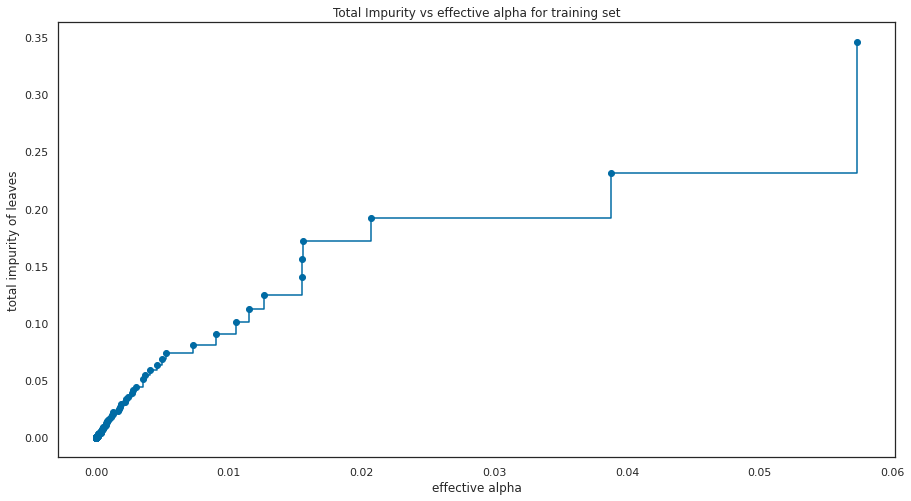

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set");

Next, we train a decision tree using the effective alphas. The last value in `ccp_alphas` is the alpha value that prunes the whole tree, leaving the tree, `clfs[-1]`, with one node.

In [ ]:
dtrs = []
for ccp_alpha in ccp_alphas:
    dtr = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    dtr.fit(X_train, y_train)
    dtrs.append(dtr)

print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format( dtrs[-1].tree_.node_count , np.round( ccp_alphas[-1], 4) ))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.4755


For the remainder of this example, we remove the last element in dtrs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the `number of nodes` and `tree depth` *decreases* as `alpha` *increases*.

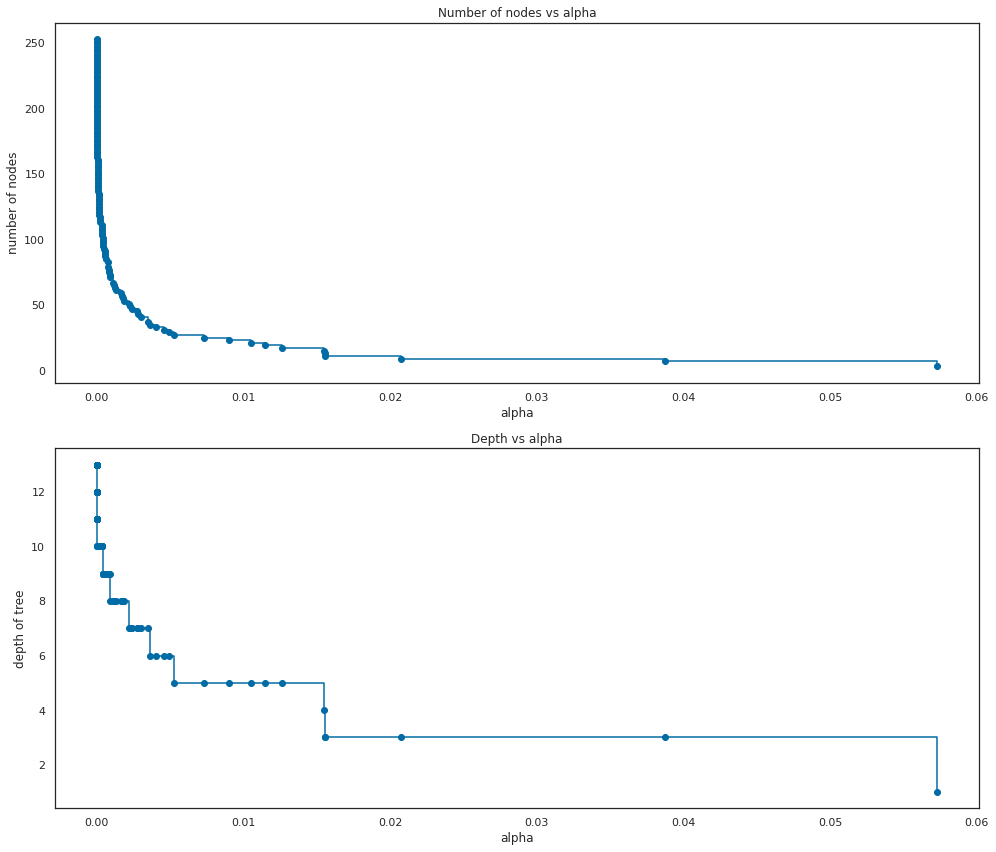

In [ ]:
dtrs = dtrs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [dtr.tree_.node_count for dtr in dtrs]
depth = [dtr.tree_.max_depth for dtr in dtrs]

fig, ax = plt.subplots(2, 1, figsize=(14,12))

ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")

ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout();

### $R^2$ vs alpha for training and testing sets

In [ ]:
test = hitters.loc[~hitters.index.isin(train.index), :]

X_test, y_test = test.iloc[:, 1:].values, np.log(test['Salary'].values)

X_test[:3], y_test[:3]

(array([[3.150e+02, 8.100e+01, 7.000e+00, 2.400e+01, 3.800e+01, 3.900e+01,
         1.400e+01, 3.449e+03, 8.350e+02, 6.900e+01, 3.210e+02, 4.140e+02,
         3.750e+02, 6.320e+02, 4.300e+01, 1.000e+01, 0.000e+00, 0.000e+00],
        [4.960e+02, 1.410e+02, 2.000e+01, 6.500e+01, 7.800e+01, 3.700e+01,
         1.100e+01, 5.628e+03, 1.575e+03, 2.250e+02, 8.280e+02, 8.380e+02,
         3.540e+02, 2.000e+02, 1.100e+01, 3.000e+00, 0.000e+00, 1.000e+00],
        [5.940e+02, 1.690e+02, 4.000e+00, 7.400e+01, 5.100e+01, 3.500e+01,
         1.100e+01, 4.408e+03, 1.133e+03, 1.900e+01, 5.010e+02, 3.360e+02,
         1.940e+02, 2.820e+02, 4.210e+02, 2.500e+01, 1.000e+00, 0.000e+00]]),
 array([6.1633148 , 6.2146081 , 6.62007321]))

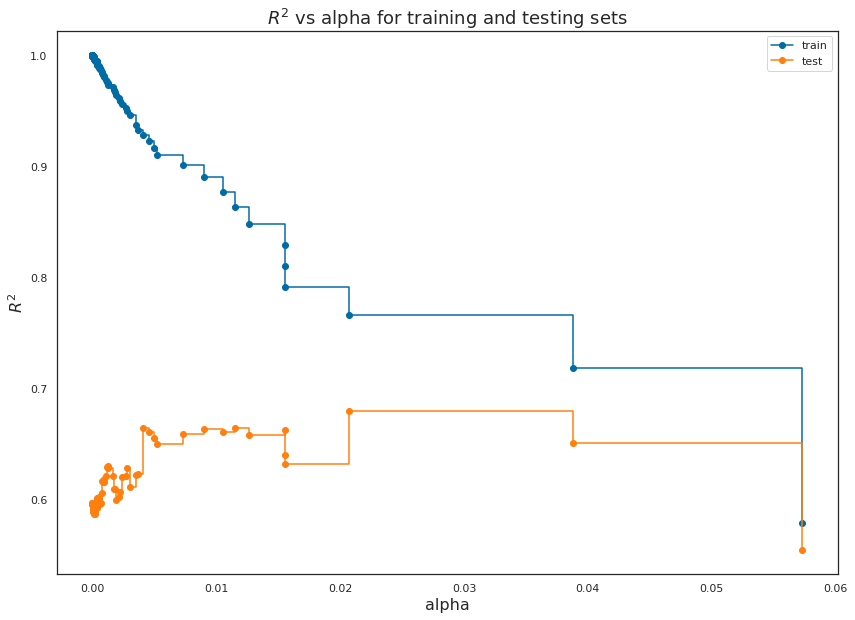

In [ ]:
train_scores = [dtr.score(X_train, y_train) for dtr in dtrs]
test_scores = [dtr.score(X_test, y_test) for dtr in dtrs]

fig, ax = plt.subplots(figsize=(14,10))
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.set_xlabel("alpha", fontsize=16)
ax.set_ylabel("$R^2$", fontsize=16)
ax.set_title("$R^2$ vs alpha for training and testing sets", fontsize=18)
ax.legend();

When `ccp_alpha` is set to zero and keeping the other default parameters of DecisionTreeRegressor, the tree overfits, leading to a 100% training accuracy. As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better.  In this example, setting ccp_alpha=0.015 maximizes the testing accuracy.

## Disadvantages of individual decision trees

- Trees can be very non-robust.  In other words, a small change in the data can cause a large change in the final estimated tree

- Trees generally do not have the same level of predictive accuracy as some other regression and classification approaches

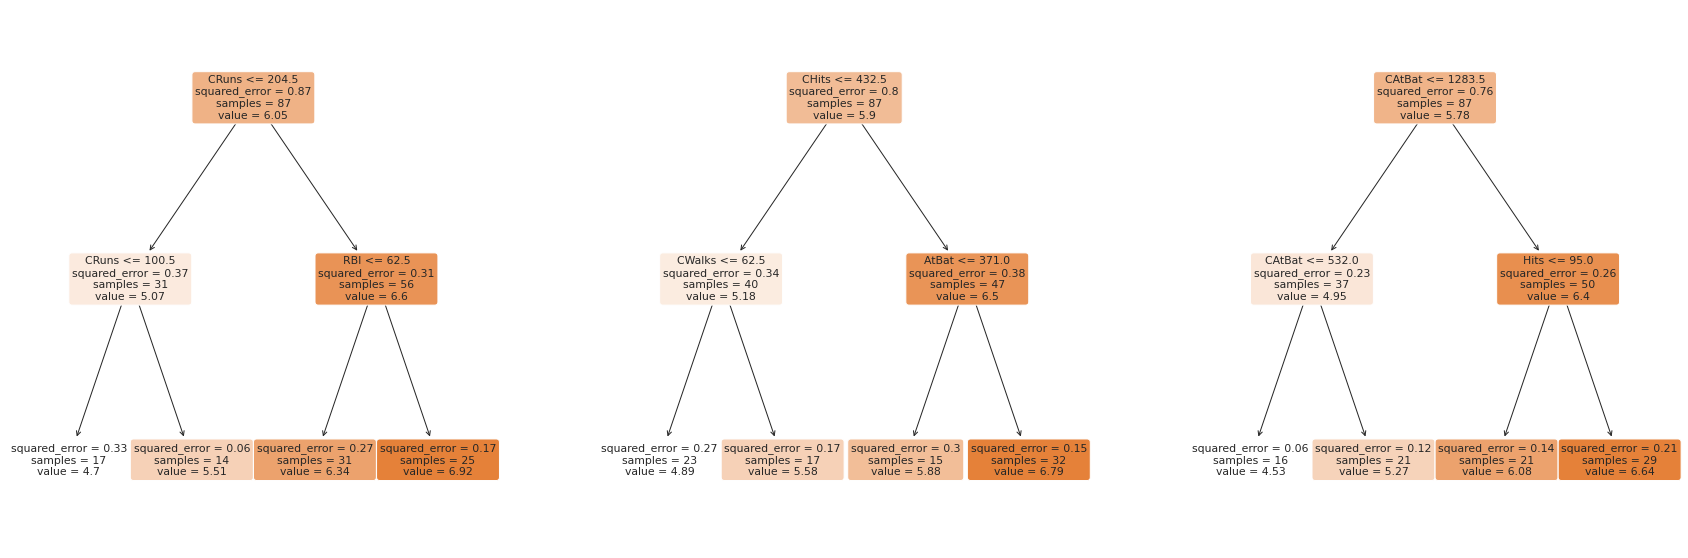

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(30,10))

# fit and plot 3 trees
for i in range(3):
    # sample 1/3 of the observations
    tmp = hitters.sample(frac=0.33)
    X, y = tmp.iloc[:, 1:].values, np.log(tmp['Salary'].values)

    # fit a decision tree with max_depth=2 (for readability)
    dtr = DecisionTreeRegressor(max_depth=2)
    dtr.fit(X, y)

    # plot the tree to visualize the variability in trees
    plot_tree(dtr, ax=ax[i], feature_names=numeric_predictors, filled=True, rounded=True, precision=2);

In [ ]:
X, y = hitters.iloc[:, 1:].values, np.log(hitters['Salary'].values)
scoring = 'r2'

dtr = DecisionTreeRegressor(random_state=157)
scores = cross_val_score(dtr, X, y, cv=5, scoring=scoring)
print('Decision tree: R-squared: %0.2f (std: %0.2f)\n' % (scores.mean(), scores.std()))

dtr = BaggingRegressor(random_state=157)
scores = cross_val_score(dtr, X, y, cv=5, scoring=scoring)
print('Bagging: R-squared: %0.2f (std: %0.2f)\n' % (scores.mean(), scores.std()))

dtr = RandomForestRegressor(random_state=157)
scores = cross_val_score(dtr, X, y, cv=5, scoring=scoring)
print('Random forests: R-squared: %0.2f (std: %0.2f)\n' % (scores.mean(), scores.std()))

dtr = ExtraTreesRegressor(random_state=157)
scores = cross_val_score(dtr, X, y, cv=5, scoring=scoring)
print('Extra trees: R-squared: %0.2f (std: %0.2f)\n' % (scores.mean(), scores.std()))

dtr = AdaBoostRegressor(random_state=157)
scores = cross_val_score(dtr, X, y, cv=5, scoring=scoring)
print('AdaBoost: R-squared: %0.2f (std: %0.2f)\n' % (scores.mean(), scores.std()))

dtr = GradientBoostingRegressor(random_state=157)
scores = cross_val_score(dtr, X, y, cv=5, scoring=scoring)
print('Gradient boosting: R-squared: %0.2f (std: %0.2f)' % (scores.mean(), scores.std()))

Decision tree: R-squared: 0.54 (std: 0.11)

Bagging: R-squared: 0.72 (std: 0.07)

Random forests: R-squared: 0.74 (std: 0.09)

Extra trees: R-squared: 0.77 (std: 0.06)

AdaBoost: R-squared: 0.71 (std: 0.05)

Gradient boosting: R-squared: 0.74 (std: 0.08)


# Exercise

## 1. Fit two decision tree regression models, one with `max_depth=2` and one with `max_depth=5`, to the random dataset, `X` and `y`
## 2. Use both models to predict `y` values based on the `X_test` values
## 3. Plot the `X` and `y` values and the two fitted decision tree regression lines

In [ ]:
# SOURCE: https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

In [ ]:
y[:5]

array([-1.1493464 ,  0.09131401,  0.09668352,  0.13651039,  0.19403525])

In [ ]:
X[:5]

array([[0.00057187],
       [0.09144139],
       [0.09683479],
       [0.13693797],
       [0.19527392]])

In [ ]:
# Fit two decision tree regression models
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(max_depth=5)

In [ ]:
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

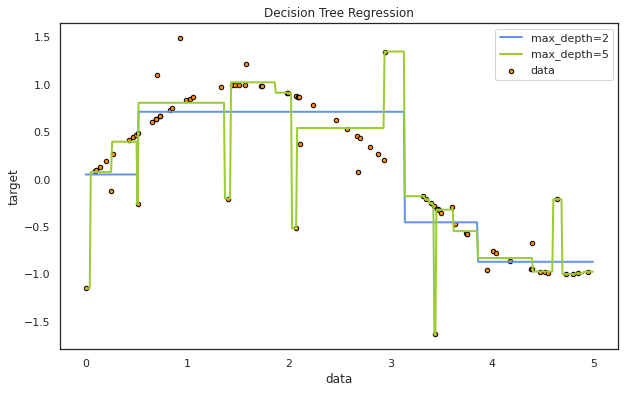

In [ ]:
# Plot the results
plt.figure(figsize=(10,6))
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend();